# Lab 6: Nonparametric Methods
In nonparametric estimation, we assume that similar inputs have similar outputs. Therefore, the nonparametric algorithm is composed of finding the similar past instances from teh training set using a suitable distance measure and interpolating from them to find the right output.

## Nonparametric density estimation

Given the sample $X$ in the training set, the cumulative distribution function can be estimated by 

$$\hat{F}(x) = \frac{\\{x^t \le x\}}{N}$$

Let $h$ be the length of the interval and the instances that fall in this interval are assumed to be close enough. The density can be estimated by

$$\hat{p}(x) = \frac{1}{h}\big{[}\frac{\\{x^t \le x+h\}-\#\{x^t\le x\}}{N}\big{]}$$


### Histogram estimator
The input space is divided into equal-sized intervals called bins $\{B_i: i=1,...,k\}$. The histogram estimator for $p(x)$ is given by 

$$\hat{p}(x) = \frac{\\{x^t\in B_x \}}{Nh}$$

where $B_x$ is the bin that $x$ falls in. In the Naive estimator, the Bin $B_x$ is replaced by the interval $[x-h/2, x+h/2]$ and the estimator is given by 

$$\hat{p}(x) = \frac{\\{-h/2 < x^t < x+h/2\}}{Nh}$$

or 

$$\hat{p}(x) = \frac{1}{Nh}\sum_{t=1}^Nw\big{(}\frac{x-x^t}{h}\big{)}$$

where $w$ is the weight function defined as $w(u) = 1$ if $|u|<1/2$ and 0 otherwise. Since the weight function is hard (0/1) the estimate is not continuous.

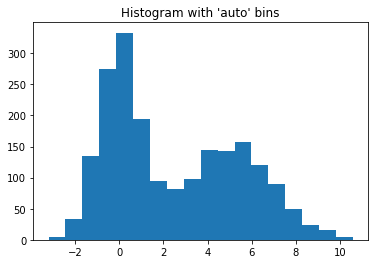

In [1]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.RandomState(10)  # deterministic random data
a = np.hstack((rng.normal(size=1000), rng.normal(loc=5, scale=2, size=1000)))
plt.hist(a, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

### Kernel estimator
The weights in the naive estimator is replaced by a probability distribution $k(x^t|h,x)$ called kernel. Typically, the kernel is symmetric about $x$ and truncated by the interval $[x-3h, x+3h]$, i.e., 

$$\hat{p}(x) = \frac{1}{Nh}\sum_{t=1}^Nk\big{(}\frac{x-x^t}{h}\big{)}$$

If $h$ is small, each training instance has a large effect in a small region and no effect on distant points. When $h$ is large, there is more overlap of the kernels and we get a smoother estimate.

C:\Python37\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if __name__ == "__main__":


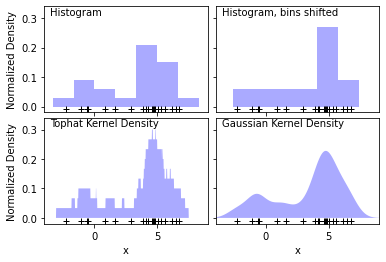

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from distutils.version import LooseVersion
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

# `normed` is being deprecated in favor of `density` in histograms
if LooseVersion(matplotlib.__version__) >= '2.1':
    density_param = {'density': True}
else:
    density_param = {'normed': True}

# ----------------------------------------------------------------------
# Plot the progression of histograms to kernels
np.random.seed(1)
N = 20
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
bins = np.linspace(-5, 10, 10)

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.05, wspace=0.05)

# histogram 1
ax[0, 0].hist(X[:, 0], bins=bins, fc='#AAAAFF', **density_param)
ax[0, 0].text(-3.5, 0.31, "Histogram")

# histogram 2
ax[0, 1].hist(X[:, 0], bins=bins + 0.75, fc='#AAAAFF', **density_param)
ax[0, 1].text(-3.5, 0.31, "Histogram, bins shifted")

# tophat KDE
kde = KernelDensity(kernel='tophat', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 0].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax[1, 0].text(-3.5, 0.31, "Tophat Kernel Density")

# Gaussian KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 1].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax[1, 1].text(-3.5, 0.31, "Gaussian Kernel Density")

for axi in ax.ravel():
    axi.plot(X[:, 0], np.full(X.shape[0], -0.01), '+k')
    axi.set_xlim(-4, 9)
    axi.set_ylim(-0.02, 0.34)

for axi in ax[:, 0]:
    axi.set_ylabel('Normalized Density')

for axi in ax[1, :]:
    axi.set_xlabel('x')

#### Plot all available kernels

Text(0.5, 1.0, 'Available Kernels')

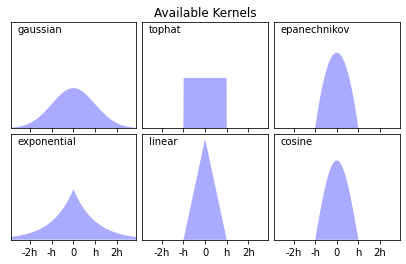

In [3]:
X_plot = np.linspace(-6, 6, 1000)[:, None]
X_src = np.zeros((1, 1))

fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)
fig.subplots_adjust(left=0.05, right=0.95, hspace=0.05, wspace=0.05)


def format_func(x, loc):
    if x == 0:
        return '0'
    elif x == 1:
        return 'h'
    elif x == -1:
        return '-h'
    else:
        return '%ih' % x

for i, kernel in enumerate(['gaussian', 'tophat', 'epanechnikov',
                            'exponential', 'linear', 'cosine']):
    axi = ax.ravel()[i]
    log_dens = KernelDensity(kernel=kernel).fit(X_src).score_samples(X_plot)
    axi.fill(X_plot[:, 0], np.exp(log_dens), '-k', fc='#AAAAFF')
    axi.text(-2.6, 0.95, kernel)

    axi.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    axi.xaxis.set_major_locator(plt.MultipleLocator(1))
    axi.yaxis.set_major_locator(plt.NullLocator())

    axi.set_ylim(0, 1.05)
    axi.set_xlim(-2.9, 2.9)

ax[0, 1].set_title('Available Kernels')

#### Plot a 1D density

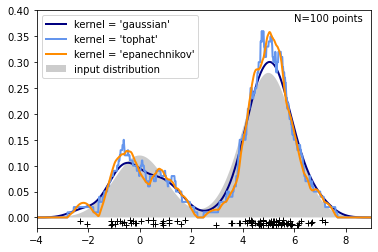

In [4]:
N = 100
np.random.seed(1)
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0])
             + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

fig, ax = plt.subplots()
ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
        label='input distribution')
colors = ['navy', 'cornflowerblue', 'darkorange']
kernels = ['gaussian', 'tophat', 'epanechnikov']
lw = 2

for color, kernel in zip(colors, kernels):
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot[:, 0], np.exp(log_dens), color=color, lw=lw,
            linestyle='-', label="kernel = '{0}'".format(kernel))

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc='upper left')
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

ax.set_xlim(-4, 9)
ax.set_ylim(-0.02, 0.4)
plt.show()

#### KDE on a sphere

In [5]:
import numpy as np
from sklearn.datasets import fetch_species_distributions

data = fetch_species_distributions()

# Get matrices/arrays of species IDs and locations
latlon = np.vstack([data.train['dd lat'],
                    data.train['dd long']]).T
species = np.array([d.decode('ascii').startswith('micro')
                    for d in data.train['species']], dtype='int')

In [6]:
from mpl_toolkits.basemap import Basemap

def construct_grids(batch):
    """Construct the map grid from the batch object

    Parameters
    ----------
    batch : Batch object
        The object returned by :func:`fetch_species_distributions`

    Returns
    -------
    (xgrid, ygrid) : 1-D arrays
        The grid corresponding to the values in batch.coverages
    """
    # x,y coordinates for corner cells
    xmin = batch.x_left_lower_corner + batch.grid_size
    xmax = xmin + (batch.Nx * batch.grid_size)
    ymin = batch.y_left_lower_corner + batch.grid_size
    ymax = ymin + (batch.Ny * batch.grid_size)

    # x coordinates of the grid cells
    xgrid = np.arange(xmin, xmax, batch.grid_size)
    # y coordinates of the grid cells
    ygrid = np.arange(ymin, ymax, batch.grid_size)

    return (xgrid, ygrid)

xgrid, ygrid = construct_grids(data)

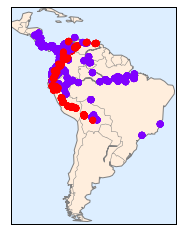

In [7]:
# plot coastlines with basemap
m = Basemap(projection='cyl', resolution='c',
            llcrnrlat=ygrid.min(), urcrnrlat=ygrid.max(),
            llcrnrlon=xgrid.min(), urcrnrlon=xgrid.max())

m.drawmapboundary(fill_color='#DDEEFF')
m.fillcontinents(color='#FFEEDD')
m.drawcoastlines(color='gray', zorder=2)
m.drawcountries(color='gray', zorder=2)

# plot locations
m.scatter(latlon[:, 1], latlon[:, 0], zorder=3,
          c=species, cmap='rainbow', latlon=True);

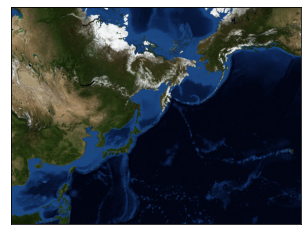

In [8]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-207.)
m.bluemarble()
plt.show()

 - computing KDE in spherical coordinates


 - plot coastlines using basemap
 - computing KDE in spherical coordinates


 - plot coastlines using basemap


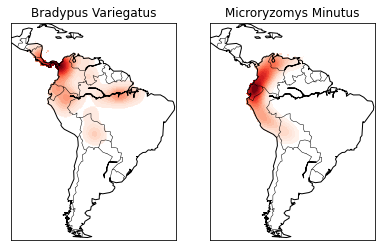

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_species_distributions
from sklearn.neighbors import KernelDensity

# if basemap is available, we'll use it.
# otherwise, we'll improvise later...
try:
    from mpl_toolkits.basemap import Basemap
    basemap = True
except ImportError:
    basemap = False

def construct_grids(batch):
    """Construct the map grid from the batch object

    Parameters
    ----------
    batch : Batch object
        The object returned by :func:`fetch_species_distributions`

    Returns
    -------
    (xgrid, ygrid) : 1-D arrays
        The grid corresponding to the values in batch.coverages
    """
    # x,y coordinates for corner cells
    xmin = batch.x_left_lower_corner + batch.grid_size
    xmax = xmin + (batch.Nx * batch.grid_size)
    ymin = batch.y_left_lower_corner + batch.grid_size
    ymax = ymin + (batch.Ny * batch.grid_size)

    # x coordinates of the grid cells
    xgrid = np.arange(xmin, xmax, batch.grid_size)
    # y coordinates of the grid cells
    ygrid = np.arange(ymin, ymax, batch.grid_size)

    return (xgrid, ygrid)

# Get matrices/arrays of species IDs and locations
data = fetch_species_distributions()
species_names = ['Bradypus Variegatus', 'Microryzomys Minutus']

Xtrain = np.vstack([data['train']['dd lat'],
                    data['train']['dd long']]).T
ytrain = np.array([d.decode('ascii').startswith('micro')
                  for d in data['train']['species']], dtype='int')
Xtrain *= np.pi / 180.  # Convert lat/long to radians

# Set up the data grid for the contour plot
xgrid, ygrid = construct_grids(data)
X, Y = np.meshgrid(xgrid[::5], ygrid[::5][::-1])
land_reference = data.coverages[6][::5, ::5]
land_mask = (land_reference > -9999).ravel()

xy = np.vstack([Y.ravel(), X.ravel()]).T
xy = xy[land_mask]
xy *= np.pi / 180.

# Plot map of South America with distributions of each species
fig = plt.figure()
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05)

for i in range(2):
    plt.subplot(1, 2, i + 1)

    # construct a kernel density estimate of the distribution
    print(" - computing KDE in spherical coordinates")
    kde = KernelDensity(bandwidth=0.04, metric='haversine',
                        kernel='gaussian', algorithm='ball_tree')
    kde.fit(Xtrain[ytrain == i])

    # evaluate only on the land: -9999 indicates ocean
    Z = np.full(land_mask.shape[0], -9999, dtype='int')
    Z[land_mask] = np.exp(kde.score_samples(xy))
    Z = Z.reshape(X.shape)

    # plot contours of the density
    levels = np.linspace(0, Z.max(), 25)
    plt.contourf(X, Y, Z, levels=levels, cmap=plt.cm.Reds)

    if basemap:
        print(" - plot coastlines using basemap")
        m = Basemap(projection='cyl', llcrnrlat=Y.min(),
                    urcrnrlat=Y.max(), llcrnrlon=X.min(),
                    urcrnrlon=X.max(), resolution='c')
        m.drawcoastlines()
        m.drawcountries()
    else:
        print(" - plot coastlines from coverage")
        plt.contour(X, Y, land_reference,
                    levels=[-9998], colors="k",
                    linestyles="solid")
        plt.xticks([])
        plt.yticks([])

    plt.title(species_names[i])

plt.show()

### k-nearest neighbor estimator
Let $d_k(x)$ be the minimum radius of an open ball of $x$ that covers $k$ points. The k-nearest neighbor density estimate is given by

$$\hat{p}(x) = \frac{k}{2Nd_k(x)}$$

The knn estimator's derivative has a discontinuity at all $1/2(x^j+x^{j+k})$. To get a smoother estimator we can use a kernel function

$$\hat{p}(x) = \frac{1}{Nd_k(x)}\sum_{t=1}^Nk\big{(}\frac{x-x^t}{d_k(x)}\big{)}$$

This is a kernel estimator with adaptive smoothing parameter $h=d_k(x)$. $k(.)$ is taken to be the Gaussian kernel.

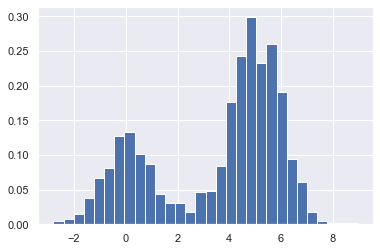

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 5
    return x

x = make_data(1000)
hist = plt.hist(x, bins=30, density=True)

In [11]:
density, bins, patches = hist
widths = bins[1:] - bins[:-1]
(density * widths).sum()


1.0

### Density estimation for multivariate data
Given a sample of $p$-dimensional obvservations $X=\{x^t\}_{t=1}^N$, the multivariate kernel density estimator is 

$$\hat{p}(x) = \frac{1}{Nh^p}\sum_{t=1}^N K\big{(}\frac{x-x^t}{h}\big{)}$$

The kernel is taken to be the multivariate Gaussian kernel

$$K(u) = \big{(}\frac{1}{\sqrt{2\pi}}\big{)}^pexp\big{[}-\frac{||u||^2}{2}\big{]}$$

or 

$$K(u) = \frac{1}{(2\pi)^{p/2}|S|^{1/2}}exp\big{[}-\frac{1}{2}u^TS^{-1}u\big{]}$$

where $S$ is the sample covariance matrix. It is also possible to calculate the local $S$ from instances in the vicinity of $x$. If the local $S$ is singular then PCA may be needed

If the inputs are discrete, we can use Hamming distance, which counts the number of nomatching attributes.

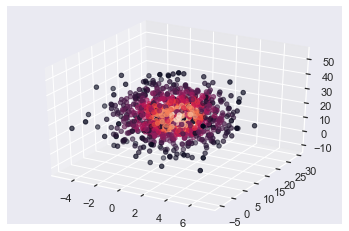

In [12]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

mu=np.array([1,10,20])
sigma=np.matrix([[4,1,1],[1,25,1],[1,1,100]])
data=np.random.multivariate_normal(mu,sigma,1000)
values = data.T
kde1 = stats.gaussian_kde(values)
density = kde1(values)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
x, y, z = values
ax.scatter(x, y, z, c=density)
plt.show()


## Nonparametric classification
The kernel estimator of the class-conditional density $P(x|C_i)$ is given by

$$\hat{p}(x) = \frac{1}{N_ih^p}\sum_{t=1}^N K\big{(}\frac{x-x^t}{h}\big{)}r_i^t$$

where $r_i^t$ is an indicator of the assignment of $x$, i.e., $r_i^t=1$ if $x\in C_i$ and $r_i^t=0$ otherwise. The MLE of the prior density is $\hat{P}(C_i) = N_i/N$. Thus the discriminant function is given by

$$g_i(x) = \hat{P}(x|C_i)\hat{P}(C_i)=\frac{1}{Nh^p}\sum_{t=1}^N K\big{(}\frac{x-x^t}{h}\big{)}r_i^t$$

For the knn estimator, we have

$$\hat{p}(x) = \frac{k_i}{2N_iV^k(x)}$$

where $k_i$ is the number of the k nearest neighbors that belong to the class $C_i$. Then the posterior probablity of the class $C_i$ is

$$\hat{P}(C_i|x) = \frac{k_i}{k}$$

## Nonparametric regression: smoothing models
In regression, given the training set $X=\{x^t,r^t\}$ where $r^t\in R$, we assume

$$r^t = g(x^t)+\epsilon$$

We assume that $g(.)$ is a smooth function. In nonparametric regrssion, we will estimate the function $g(x)$ locally by the nearby points of $x$


### Running mean smoother
The function $g(x)$ is estimated by the moving average

$$\hat{g}(x) = \frac{\sum_{t=1}^Nw\big{(}\frac{x-x^t}{h}\big{)}r^t}{\sum_{t=1}^{N}w\big{(}\frac{x-x^t}{h}\big{)}}$$

where $w(u)$ is an indicator function whether the point $x^t$ is in the neighborhood of $x$, i.e., $w(u) = 1$ if $|u|<1$ and 0 otherwise.

            Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44


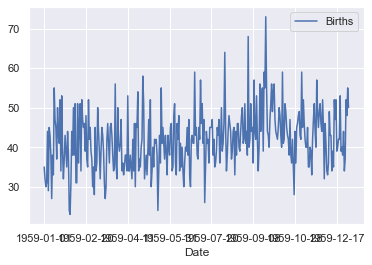

In [13]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('https://book.phylolab.net/machine_learning_data/daily-total-female-births.csv', header=0, index_col=0)
print(series.head())
series.plot()
pyplot.show()

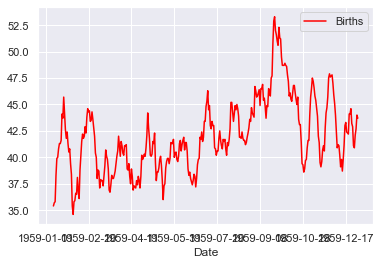

In [14]:
# Tail-rolling average transform
rolling = series.rolling(window=10)
rolling_mean = rolling.mean()
#print(rolling_mean.head(50))
# plot original and transformed dataset
rolling_mean.plot(color='red')
pyplot.show()

### Kernel smoother
The function $g(x)$ is estimated by the moving average

$$\hat{g}(x) = \frac{\sum_{t=1}^NK\big{(}\frac{x-x^t}{h}\big{)}r^t}{\sum_{t=1}^{N}K\big{(}\frac{x-x^t}{h}\big{)}}$$

Typically a Gaussian kernel $K(.)$ is used. Alternatively, instead of fixing $h$, we can fix the number of neighbors and getting the knn smoother.

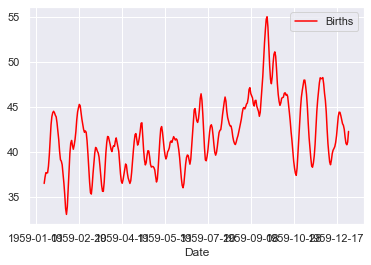

In [15]:
rolling = series.rolling(10, win_type='triang')
rolling_mean = rolling.mean()
rolling_mean.plot(color='red')
pyplot.show()

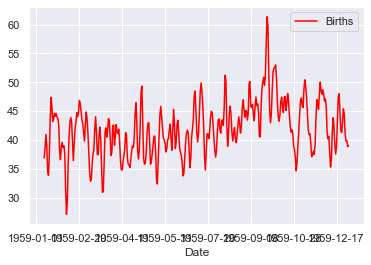

In [16]:
rolling = series.rolling(10, win_type='gaussian')
rolling_mean = rolling.mean(std=1)
rolling_mean.plot(color='red')
pyplot.show()

### Running line smoother
Instead of taking an average, we can fit a local linear regression line using the neighbors of $x$ and then estimate $g(x)$ from the regression line. 

In the locally weighted running line smoother (loess), instead of a hard definition of neighborhoods, we use kernel weighting such that distant points have less effect on error. 

    
## How to choose the smoothing parameter
In nonparametric methods, choosing the correct smoothing parameters are important in oversmoothing or undersmoothing problems.

A regularized cost function as used in smoothing splines

$$\sum_t \big{[}r^t -\hat{g}(x^t) \big{]}^2 + \lambda \int_a^b[\hat{g}''(x)]^2dx$$

The first term is the error of fit. The second term $\hat{g}''(x)$ is the curvature of the estimated function $\hat{g}(x)$.

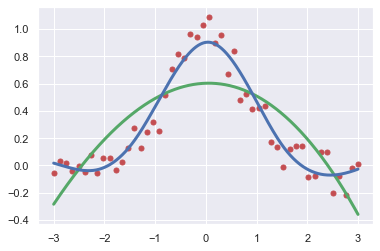

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
x = np.linspace(-3, 3, 50)
y = np.exp(-x**2) + 0.1 * np.random.randn(50)
plt.plot(x, y, 'ro', ms=5)

spl = UnivariateSpline(x, y)
xs = np.linspace(-3, 3, 1000)
plt.plot(xs, spl(xs), 'g', lw=3)

spl.set_smoothing_factor(0.5)
plt.plot(xs, spl(xs), 'b', lw=3)
plt.show()